## Profiling (7 pts + 2 bonus pts)

Before we go any further and start looking at how vectorization makes your program faster, we need to talk about profiling. Profiling is the act of measuring performance of a program, either by timing it or by looking into memory access, depending on what is you are trying to measure.

(Follow the instructions here: https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html to setup the profilers)

# **Remember to save your file after generating all the required results. Then we can directly see your results.**

### Time

This is the most common profiler. In a python code you just import the time module and measure starting and ending time. For IPython we can call the %time %%time and %%timeit magic

In [1]:
%time?

# Question 1 (0.5 pts)
Run the following code and explain its output

In [2]:
%%time
total = 0
for i in range(1000):
    for j in range(1000):
        total += i * (-1) ** j

CPU times: user 2.18 s, sys: 0 ns, total: 2.18 s
Wall time: 2.26 s


The output I see after running the code was the CPU times which was user: 2.18s, sys: 0ns, and total: 2.18s. It also displayed the wall time which was 2.26s

# Question 2 (0.5)
There are two blocks of code below performing the same function on a given input, explain why the second sort is much faster

In [3]:
import random
L = [random.random() for i in range(100000)]
%time L.sort()

CPU times: user 184 ms, sys: 0 ns, total: 184 ms
Wall time: 213 ms


In [4]:
%time L.sort()

CPU times: user 20 ms, sys: 0 ns, total: 20 ms
Wall time: 28.2 ms


After comparing the two, I noticed that the user CPU time was cut down from 184ms to 20ms. This is due to the first block of code sorts for an assortion of 100000 random unsorted list vs the 2nd block only sorting for a sorted list

# Question 3 (1 pts)
Use Python memory_profiler to profile your own code and explain the results

In [10]:
!pip3 install memory_profiler

In [11]:
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [12]:
def sum_of_lists(N):
    total = 0
    for i in range(5):
        L = [j ^ (j >> i) for j in range(N)]
        total += sum(L)
    return total

In [14]:
%memit sum_of_lists(999999)

peak memory: 128.84 MiB, increment: 74.96 MiB


I used a simple sum_of_lists function that gives the sum of numbers if it falls within N range. I noticed after running the memit profiler, the peak memory was 128.84 MiB and incremented at 74.96 MiB. This shows how much memory was used when running a basic summation function. 

# Question 4 (7 pts)
Run the following codes to measure execution time, memory usage and answer the following questions.
Note: Make sure to install any missing Python packages

1. This code snippet defines and runs a simple Python function hello() that prints 'hello world!'. It also employs the memory_profiler module to profile the memory usage of the hello() function with a specified precision.

In [25]:
%%time
%%file helloworld.py
from memory_profiler import profile

@profile(precision=4)
def hello():
	print("hello world!") 

hello()

Overwriting helloworld.py
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 12 ms


In [26]:
%run -i helloworld.py

hello world!
Filename: /home/group7/Downloads/helloworld.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     3  64.7734 MiB  64.7734 MiB           1   @profile(precision=4)
     4                                         def hello():
     5  64.7734 MiB   0.0000 MiB           1   	print("hello world!") 




2. This code snippet demonstrates memory profiling for a Python function my_func() that creates, manipulates, and deletes large lists, showcasing how memory usage changes with these operations

In [27]:
%%time
%%file expressions.py
from memory_profiler import profile
@profile(precision=4)
def my_func():
    a = [1] * (10 ** 6)
    b = [2] * (2 * 10 ** 7)
    del b
    return a
my_func()

Overwriting expressions.py
CPU times: user 0 ns, sys: 4 ms, total: 4 ms
Wall time: 12.1 ms


In [28]:
%run -i expressions.py

Filename: /home/group7/Downloads/expressions.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     2  64.7734 MiB  64.7734 MiB           1   @profile(precision=4)
     3                                         def my_func():
     4  66.1719 MiB   1.3984 MiB           1       a = [1] * (10 ** 6)
     5 214.8711 MiB 148.6992 MiB           1       b = [2] * (2 * 10 ** 7)
     6  62.2344 MiB -152.6367 MiB           1       del b
     7  62.2344 MiB   0.0000 MiB           1       return a




3. This code snippet profiles memory usage of the function math_funcs(), which demonstrates the application of logarithmic, cosine, and reciprocal functions from the NumPy library on an array of numbers, and prints the results for each operation.

In [29]:
%%time
%%file math_funcs.py
from memory_profiler import profile
import math
import numpy as np

@profile(precision=4)
def math_funcs():
	inp_arr = [10, 20, 30, 40, 50] 
	print ("Array input elements:\n", inp_arr) 

	res_arr = np.log(inp_arr) 
	print ("Applying log function:\n", res_arr)

	res_arr2 = np.cos(inp_arr) 
	print ("Applying cos function:\n", res_arr2)

	res_arr3 = np.reciprocal(inp_arr) 
	print ("Applying reciprocal function:\n", res_arr3)


math_funcs()

Overwriting math_funcs.py
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 11.7 ms


In [30]:
%run -i math_funcs.py

Array input elements:
 [10, 20, 30, 40, 50]
Applying log function:
 [ 2.30258509  2.99573227  3.40119738  3.68887945  3.91202301]
Applying cos function:
 [-0.83907153  0.40808206  0.15425145 -0.66693806  0.96496603]
Applying reciprocal function:
 [0 0 0 0 0]
Filename: /home/group7/Downloads/math_funcs.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     5  62.2969 MiB  62.2969 MiB           1   @profile(precision=4)
     6                                         def math_funcs():
     7  62.2969 MiB   0.0000 MiB           1   	inp_arr = [10, 20, 30, 40, 50] 
     8  62.2969 MiB   0.0000 MiB           1   	print ("Array input elements:\n", inp_arr) 
     9                                         
    10  62.2969 MiB   0.0000 MiB           1   	res_arr = np.log(inp_arr) 
    11  63.4453 MiB   1.1484 MiB           1   	print ("Applying log function:\n", res_arr)
    12                                         
    13  63.4453 MiB   0.0000 MiB           1   	res_arr2 = np.

4. This code snippet, using memory profiling, demonstrates a nested loop in Python where it iterates through combinations of adjectives and fruit names, printing each pair.

In [31]:
%%time
%%file loops.py
from memory_profiler import profile
import numpy as np
import ctypes
import math
import time

@profile(precision=4)
def my_loops():
	adj = ["red", "big", "tasty"]
	fruits = ["apple", "banana", "cherry"]

	for x in adj:
 		 for y in fruits:
   			 print(x, y)


my_loops()

Overwriting loops.py
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 9.29 ms


In [32]:
%run -i loops.py

red apple
red banana
red cherry
big apple
big banana
big cherry
tasty apple
tasty banana
tasty cherry
Filename: /home/group7/Downloads/loops.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     7  63.4453 MiB  63.4453 MiB           1   @profile(precision=4)
     8                                         def my_loops():
     9  63.4453 MiB   0.0000 MiB           1   	adj = ["red", "big", "tasty"]
    10  63.4453 MiB   0.0000 MiB           1   	fruits = ["apple", "banana", "cherry"]
    11                                         
    12  63.4453 MiB   0.0000 MiB           4   	for x in adj:
    13  63.4453 MiB   0.0000 MiB          12    		 for y in fruits:
    14  63.4453 MiB   0.0000 MiB           9      			 print(x, y)




## Question 4.1 (1.5 pts)
Modify each of the above function to capture their execution time (Both CPU and Wall). You can modify the code directly, if required.

In [ ]:
#The code blocks for the functions were overwritten above to include time also that demonstrats CPU and Wall execution time

## Question 4.2 (1.5 pts)

What patterns did you notice between each of the above function with respect to latency, memory usage and code ?


After running each of the functions, I've noticed that each function had the same CPU times but had very small variences between Wall times, Memory usage, and latency. Despite some code having more or less lines than the other, always used similar memory. I did notice that function 2 has line 5 where it used 4x the memory compared to the rest of the lines. This is probably because it had multiplication with multiple numbers and powers. Lastly, even with function 4 line 13 repeating 12 times, it used way less memory compared to function 2 line 5. 

## Question 4.3 (2 pts)
Using %time magic command, we can trace overall code execution time. Sometimes, you might have to get deeper insights to identify performance bottlenecks. Write your own code and profile execution time line by line.

In [35]:
!pip3 install line_profiler

     |████████████████████████████████| 196 kB 1.5 MB/s            
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for line-profiler: filename=line_profiler-4.1.3-cp36-cp36m-linux_aarch64.whl size=477330 sha256=b4dae9880c83ac25f5983e0a6c6440aa3a0d9875f38acfd8f57f8bda813de26b
  Stored in directory: /root/.cache/pip/wheels/92/12/67/36ba1d1d8a3deb090adbf74b56e1dbd45c7d5f30cd70e112f5
Successfully built line-profiler


In [36]:
%load_ext line_profiler

In [38]:
%lprun -f sum_of_lists sum_of_lists(53400)

## (Bonus) Question 4.4 (2 pts)
Memory usage of a program can also be reported as a function of time. Profile memory of any of the above code as a function of time.
Submit your profile results and a plot of the results (Mem used vs Time).

In [44]:
from memory_profiler import memory_usage
import time

mem_usage = memory_usage((sum_of_lists,), interval=0.1)

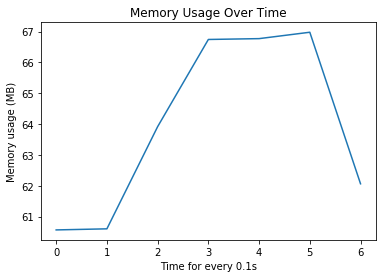

In [45]:
import matplotlib.pyplot as plt

plt.plot(mem_usage)
plt.xlabel('Time for every 0.1s')
plt.ylabel('Memory usage (MB)')
plt.title('Memory Usage Over Time')
plt.show()

The plot is shown when the code blocks are ran